# HHA550_Diabetes Prediction Dataset

## Healthcare-dataset-diabetes-data


# DATA
## Diabetes Dataset


#### 
Context

The dataset represents a span of ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

Source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# .CSV Data
### Healtcare-dataset-diabetes-data.csv

# IMPORTING Everthing

In [8]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
    
!pip install seaborn
!pip install missingno
!pip install xgboost
!pip install catboost
!pip install regex
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install imblearn
!pip install lightgbm

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [11]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

Import additional items as needed...
We may not use them all in this course...

In [12]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2




In [4]:
from imblearn.over_sampling import SMOTE

* If from imblearn.oversampling import SMOTE does not load use
    `conda install -c conda-forge imbalanced-learn`
* Then rerun
    `from imblearn.over_sampling import SMOTE`

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [72]:
diabetes = pd.read_csv('C:\\Users\\johnc\\Downloads\\diabetes+130-us+hospitals+for+years+1999-2008 (1)\\diabetic_data.csv')

Here I am printing the dataset to make sure that it is being read correctly

In [73]:
print(diabetes)

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

#### Looking at the data
Now we will try to look at the some of the rows of the dataframe. If you need to see more than 5 lines of the dataframe you can use the parameter inside the 'head' function. 
Like: 'stroke.head(n = 10)'

In [74]:
diabetes.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Here I am wanting a better look at the first 5 rows of the dataset to see what the columns contain more clearly

Using the .columns attribute I get a list of the column names so that I can see which ones I would like to keep. 

In [75]:
print(diabetes.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


After looking over the columns and the data dictionary provided by the website where the dataset was imported from https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008. I determined that the columns that were most likely not going to be important were the following listed below.

In [76]:
drop_columns = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
diabetes_dropped = diabetes.drop(columns=drop_columns)

Now I created a new dataframe called diabetes_dropped so that I can keep my original dataset untouched incase I need it in the future

In [77]:
print(diabetes_dropped)

                   race  gender      age weight  time_in_hospital  \
0             Caucasian  Female   [0-10)      ?                 1   
1             Caucasian  Female  [10-20)      ?                 3   
2       AfricanAmerican  Female  [20-30)      ?                 2   
3             Caucasian    Male  [30-40)      ?                 2   
4             Caucasian    Male  [40-50)      ?                 1   
...                 ...     ...      ...    ...               ...   
101761  AfricanAmerican    Male  [70-80)      ?                 3   
101762  AfricanAmerican  Female  [80-90)      ?                 5   
101763        Caucasian    Male  [70-80)      ?                 1   
101764        Caucasian  Female  [80-90)      ?                10   
101765        Caucasian    Male  [70-80)      ?                 6   

        num_lab_procedures  num_procedures  num_medications  \
0                       41               0                1   
1                       59               0   

Using .dtypes I am checking to see what types the data within the columns are characterized as.

In [78]:
print(diabetes_dropped.dtypes)

race                        object
gender                      object
age                         object
weight                      object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide          

I am now finding out how many columns have missing values and how much is missing. As of now the columns 'max_glu_serum' and
'A1Cresult' are the only ones with missing values.

In [79]:
missing_values = diabetes_dropped.isna().sum()

print(missing_values)

race                            0
gender                          0
age                             0
weight                          0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide       

However, looking at the dataset in excel I also saw that there were cells that were essentially useless as they contained '?'. 
This essentially is the same as no data and so I changed those cells to NaN. Below is how many there were.

In [80]:
diabetes_dropped.replace('?', pd.NA, inplace=True)

question_marks = diabetes.isin(['?']).sum()

print(question_marks)


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Now here is a simple if else statment to see if the change to NaN worked.

In [82]:
question_marks_left = diabetes_dropped.isin(['?']).any().any()

if question_marks_left:
    print("There are still '?' values in the dataset.")
else:
    print("There are no more '?' values in the dataset.")

There are no more '?' values in the dataset.


Even though I didn't want to I decided in the end to drop the weight column as it was the column that contianed the most unusable cells at 98K. Below is me using the .drop attribute to get rid of it. 

In [84]:
diabetes_dropped = diabetes_dropped.drop(columns=['weight'])

In [85]:
diabetes_dropped.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Here I wanted to vizualize the missing data aswell and that is when I noticed how the columns 'max_glu_serum' and 'A1Cresult' were exremely low compared to the other columns. I then looked at the dataset and found that many of the cells in those column say 'None'. 


<Axes: >

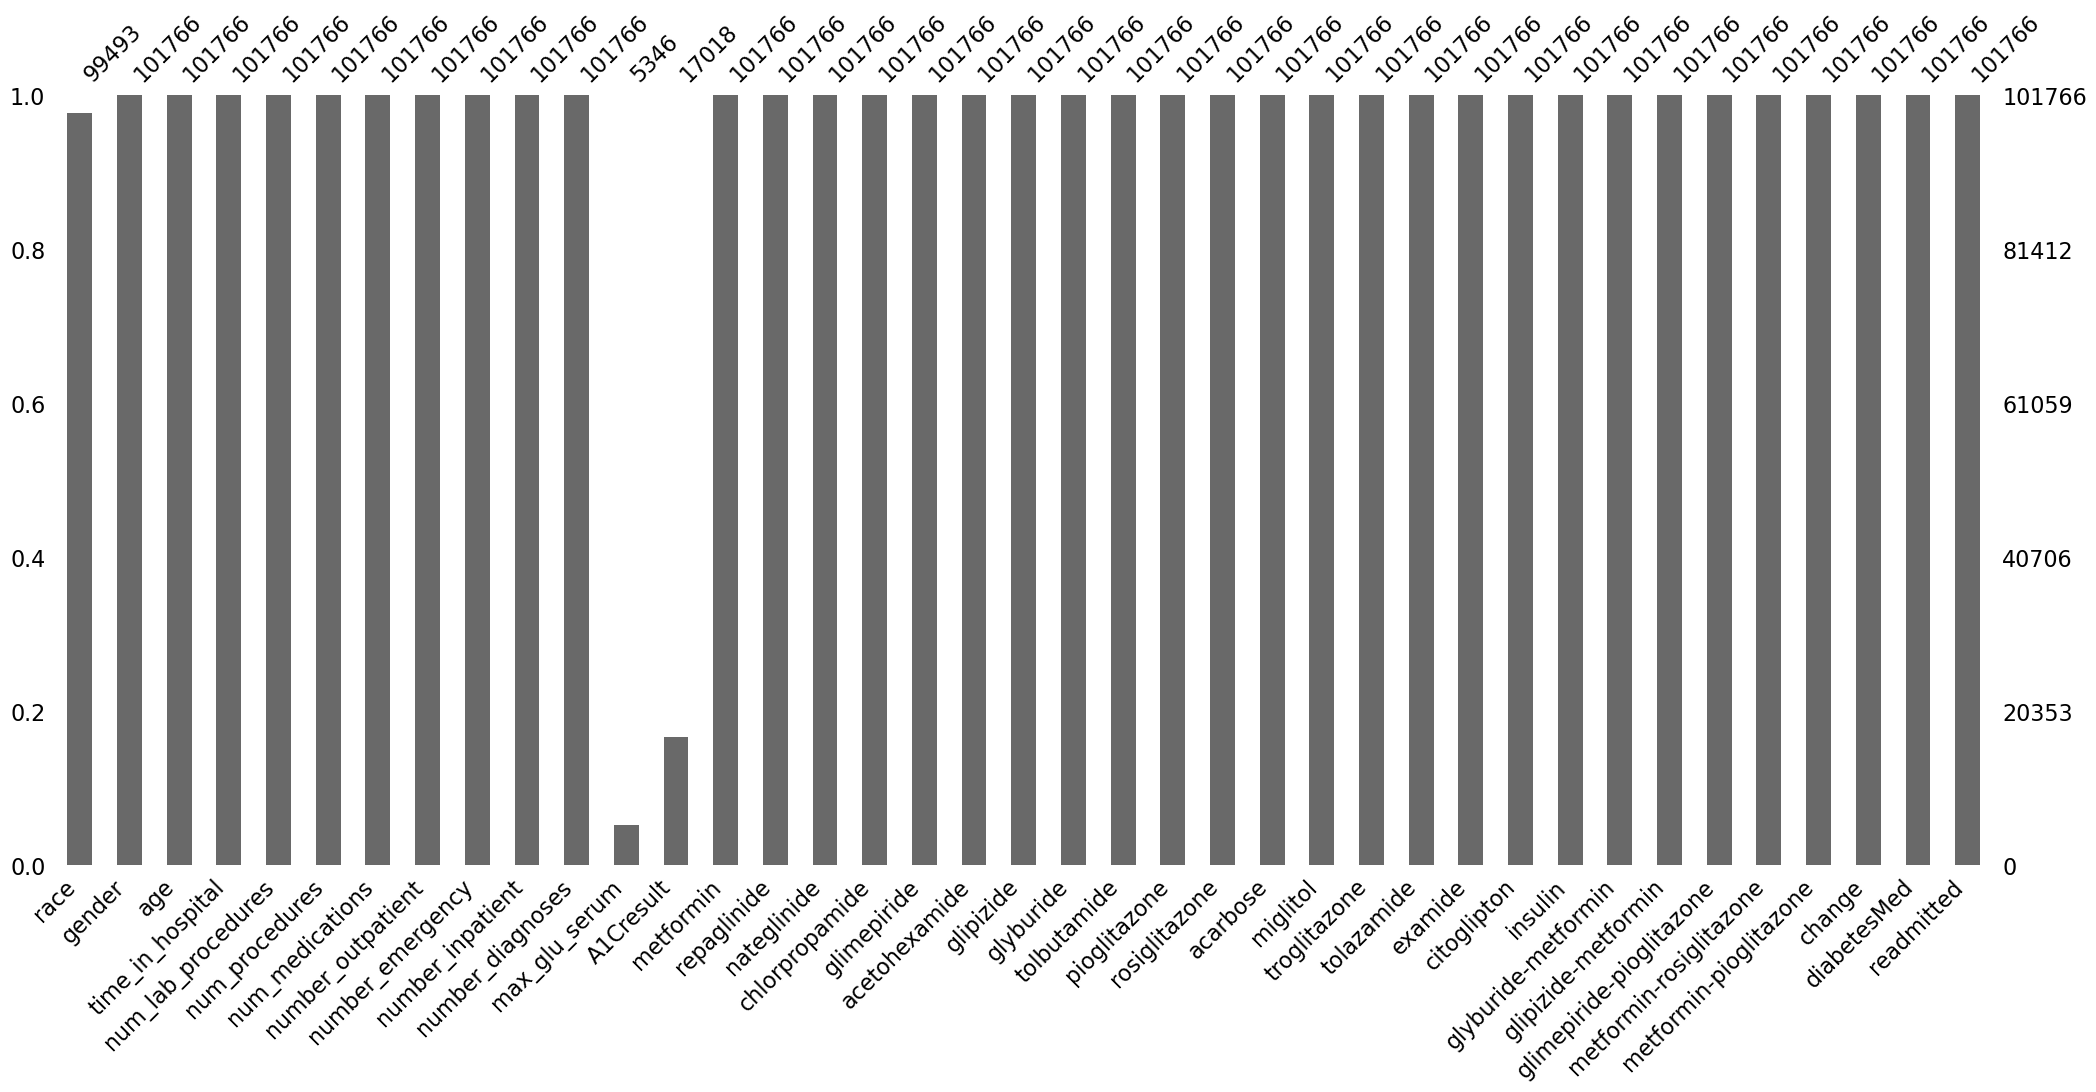

In [86]:
msno.bar(diabetes_dropped)

Here I am now going to change the data in the 'max_glu_serum' and 'A1Cresult' columns from 'None' to 'NaN' like I did with the question marks before. 

In [95]:
diabetes_dropped['max_glu_serum'].replace(np.nan, 'NaN', inplace=True)
diabetes_dropped['A1Cresult'].replace(np.nan, 'NaN', inplace=True)

Here I wanted to confirm that the changes relfected and so I wanted to make sure there were no more 'None' values. Here I am printing all the unique values conatiained in each column to see if 'None' pops up. As you can see they didn't anymore. 

In [96]:

print(diabetes_dropped['max_glu_serum'].unique())

print(diabetes_dropped['A1Cresult'].unique())

['NaN' '>300' 'Norm' '>200']
['NaN' '>7' '>8' 'Norm']


As can be seen there the matrix has been updated with the updated values to show less missing values

<Axes: >

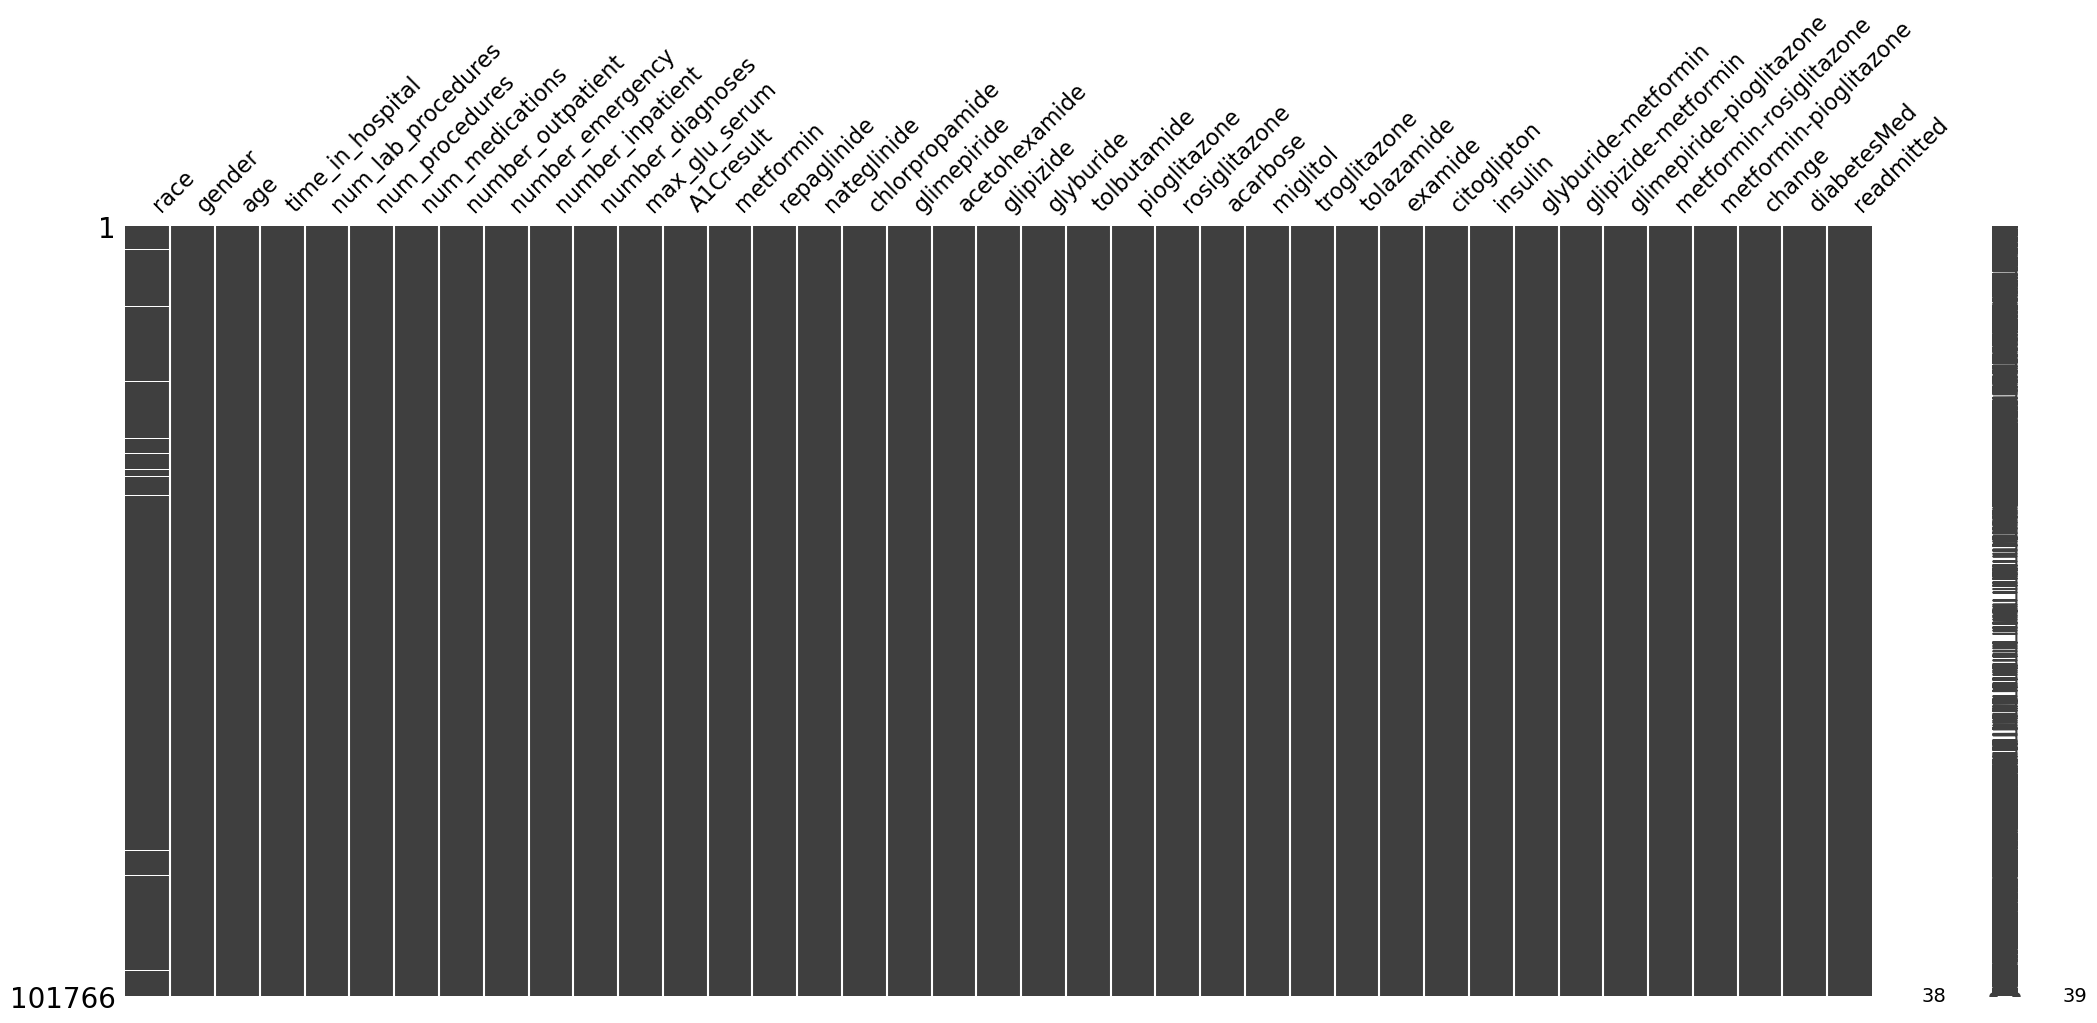

In [97]:
msno.matrix(diabetes_dropped)

To make sure and quantify the change here is a graph showing the percentage of missing values in each column. As can be seen the only column with a measuralble amount of missing values is 'race'. 

In [98]:
def missing (diabetes_dropped):
    missing_number = diabetes_dropped.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes_dropped.isnull().sum()/diabetes_dropped.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes_dropped)

,Missing_Number,Missing_Percent
race,2273,0.022336
citoglipton,0,0.000000
pioglitazone,0,0.000000
rosiglitazone,0,0.000000
acarbose,0,0.000000
miglitol,0,0.000000
troglitazone,0,0.000000
tolazamide,0,0.000000
examide,0,0.000000
insulin,0,0.000000


In the end I wanted to download the new cleaned dataset so that I can use it later on for analysis. 

In [99]:
diabetes_dropped.to_csv('diabetes_cleaned.csv', index=False)